In [1]:
import sys
import logging

sys.path.append("../")
from experiments.cbo_aspirin_statin_het_example import *
from experiments.pomps_aspirin_statin_het_example import *

import pandas as pd
import networkx as nx


In [ ]:
smoke_test = False
n_iter = 400
experiment_name = 'test'
# exp = POMPSExperiment(environ.fcm, {"aspirin", 'statin'}, {'age', "bmi"},
#                           environ.domain, n_iter=16 if smoke_test else n_iter,
#                           objetive=OptimizationObjective.minimize,
#                           droppable_scopes=[MixedPolicyScope(set()),
#                                             MixedPolicyScope({PolicyComponent('aspirin', {'age', 'bmi'})}),
#                                             MixedPolicyScope({PolicyComponent('statin', {'age', 'bmi'})})],
#                           experiment_name=experiment_name)

exp_cbo = CaBOExperiment(environ.fcm, {"age", "bmi", "cancer"},
                         environ.domain, "Y", n_iter=16 if smoke_test else n_iter,
                         experiment_name=experiment_name, objetive=OptimizationObjective.minimize)
exp_cbo.iterate({"smoke_test": smoke_test, "seed": 42}, smoke_test=smoke_test)

  0%|          | 0/400 [00:00<?, ?it/s]

Warning - optimization restart 10/10 failed


In [ ]:
exp.policies_active[0][0].induced_graph().edges

In [3]:
df = pd.DataFrame(exp._results_store).reset_index()
df = df.sort_values("index")
df['EXP_ID'] = 0
df['Regret'] = df['Y']
df['Cum_Regret'] = df['Regret'].cumsum()

<AxesSubplot:>

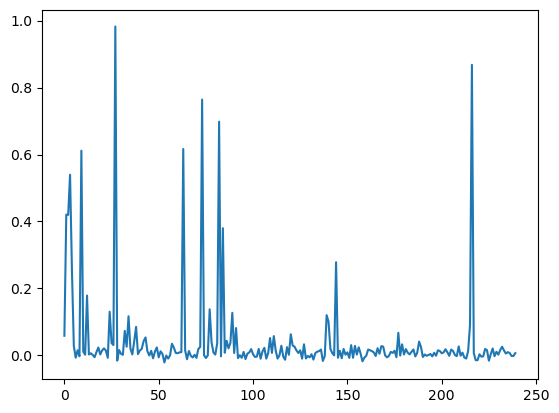

In [4]:
df.Y.plot()

<AxesSubplot:>

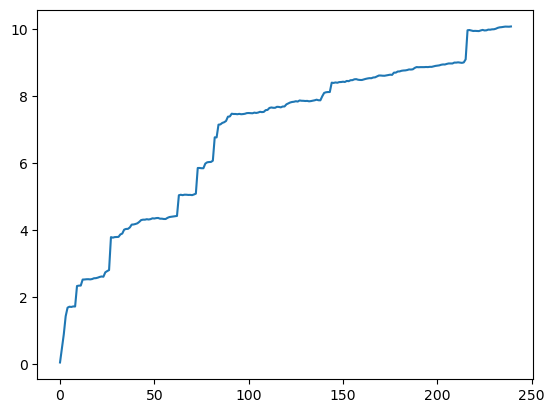

In [5]:
df.Cum_Regret.plot()

In [21]:
df

,index,bmi,age,aspirin,statin,cancer,Y,MPS,EXP_ID,Regret,Cum_Regret
0,0,26.723995,66.447105,0.000000,0.000000,0.001415,-0.005398,"<aspirin, ['age', 'bmi']>\t<statin, ['age', 'b...",0,0.005398,0.005398
1,1,25.868704,75.173599,0.500000,0.500000,0.448818,-0.334723,"<aspirin, ['age', 'bmi']>\t<statin, ['age', 'b...",0,0.334723,0.340121
2,2,26.156408,69.530052,0.750000,0.250000,0.365043,0.013911,"<aspirin, ['age', 'bmi']>\t<statin, ['age', 'b...",0,-0.013911,0.326210
3,3,26.865183,72.839394,0.250000,0.750000,0.594570,-0.036666,"<aspirin, ['age', 'bmi']>\t<statin, ['age', 'b...",0,0.036666,0.362876
4,4,27.124496,72.306122,0.375000,0.375000,0.211595,0.022634,"<aspirin, ['age', 'bmi']>\t<statin, ['age', 'b...",0,-0.022634,0.340242
...,...,...,...,...,...,...,...,...,...,...,...
173,173,26.777569,57.638786,0.015319,0.321932,0.103807,0.003547,"<aspirin, ['age', 'bmi']>\t<statin, ['age', 'b...",0,-0.003547,3.395520
174,174,27.090508,62.951618,0.999575,0.443622,0.696450,0.463505,"<aspirin, ['age', 'bmi']>\t<statin, ['age', 'b...",0,-0.463505,2.932015
175,175,26.981943,69.629868,0.013413,0.006869,0.000147,0.014534,"<aspirin, ['age', 'bmi']>\t<statin, ['age', 'b...",0,-0.014534,2.917481
176,176,26.250210,70.690292,0.398406,0.974694,1.049007,-0.296730,"<aspirin, ['age', 'bmi']>\t<statin, ['age', 'b...",0,0.296730,3.214211
